In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import warnings

warnings.filterwarnings("ignore")

plt.style.use(['nature', "no-latex"])

methods = ['Evaluated: et', 'mean', 'hyperimpute', 'missforest', 'gain', 'sinkhorn']


def extra_mean(s):
    return float(s.split('+/-')[0])


def extra_std(s):
    return float(s.split('+/-')[1])


file2plotname = {
    "Bala_classification_dataset": "Bala Classification",
    "Bala_regression_dataset": "Bala Regression",
    "CCPM": "PUE",
    "BMDS_data": "BMDS",
    "Crystal_structure": "Crystal Structure",
    "glass": "Glass",
    "Rajan_MXene_data": "Rajan MXene",
    "PUE": "PUE",
    "bandgap": "Band Gap",
}

my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#B3DE69", "#FFC0D9", "#5FBDFF", "#FDBF6F"])
# my_palette = sns.color_palette(["#ff595e","#ff924c","#ffca3a","#c5ca30","#8ac926","#1982c4","#6a4c93"],n_colors=7)

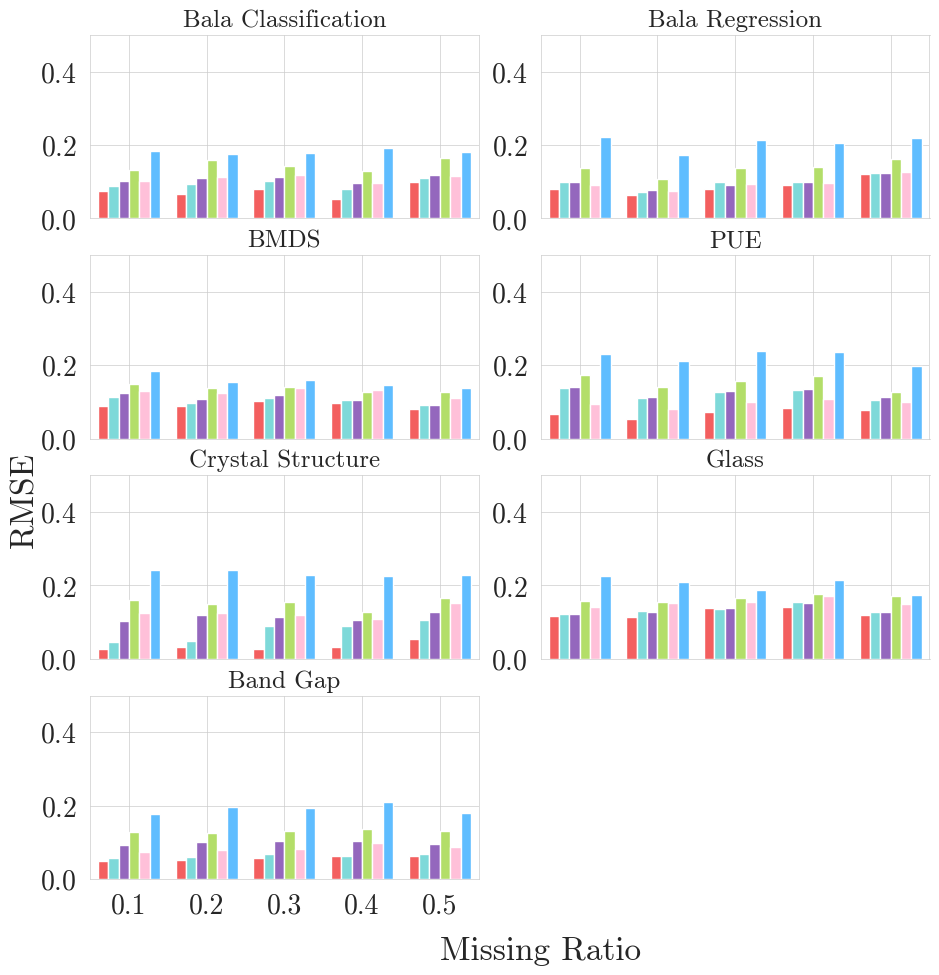

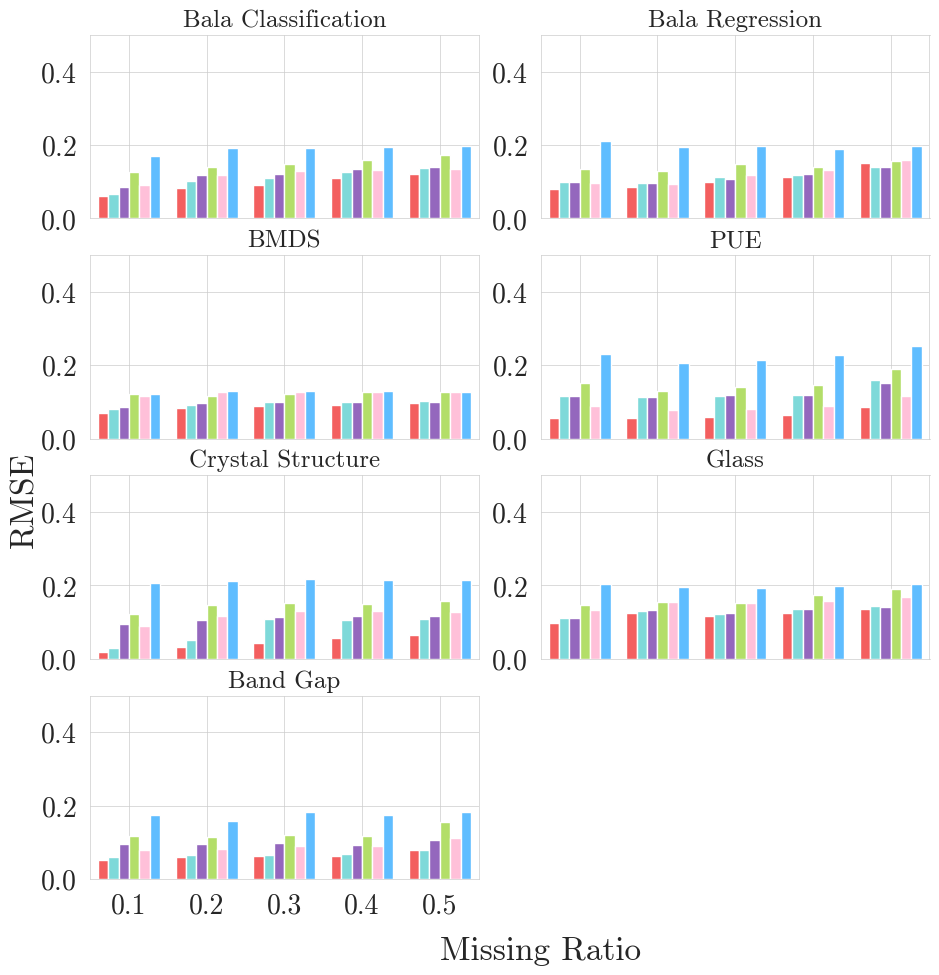

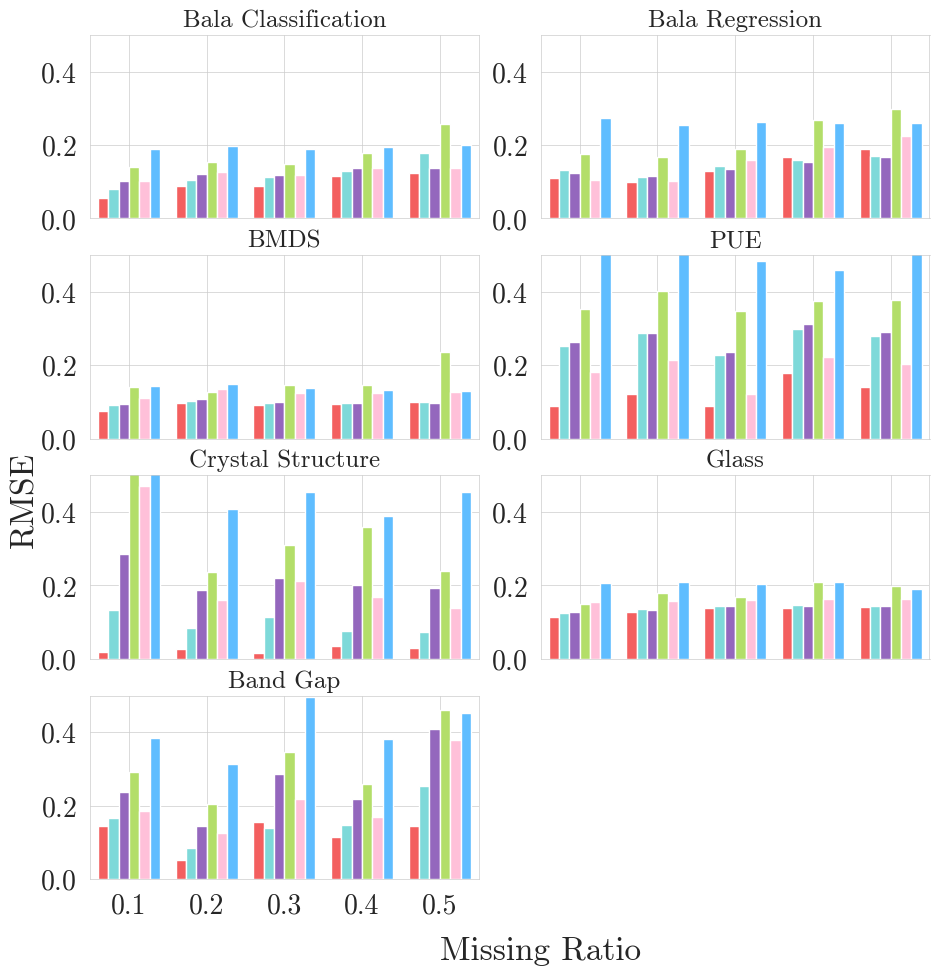

In [7]:
import glob

# files = glob.glob('./Et-knn-*_rmse.csv')
# files.remove('.\\Et-knn-CCPM_rmse.csv')
files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv',
         '.\\Et-knn-bandgap_rmse.csv']

scenarios = ['MAR', 'MCAR', 'MNAR']

for s in scenarios:
    fig = plt.figure(figsize=(10, 10))
    axes = fig.subplots(4, 2, sharex=True)
    axes = axes.flatten()
    for file in files:
        ax = axes[files.index(file)]

        df = pd.read_csv(file)
        df[methods] = df[methods].applymap(extra_mean)
        df_MAR = df[df['Scenario'] == s]
        plot_data = pd.DataFrame(columns=["ratio", "method", "RMSE"])
        for method in methods:
            for i in range(len(df_MAR)):
                if method == "Evaluated: et":
                    method_plot = "MatImpute"
                else:
                    # 首字母大写
                    method_plot = method.capitalize()
                plot_data = pd.concat([plot_data, pd.DataFrame(
                    {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "RMSE": df_MAR.iloc[i][method]}, index=[0])])
        # 根据ratio画出每个方法的RMSE柱状图
        # ax = sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data)
        # 更改hue的顺序，根据顺序["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn","Mean", ]画柱状图
        sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data,
                    hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                    palette=my_palette, ax=ax,saturation=1)

        # set font size
        ax.tick_params(labelsize=20)
        # ax.yaxis.set_visible(False)
        # del legend
        ax.get_legend().remove()
        # del x label
        ax.set_xlabel('')
        # del y label
        ax.set_ylabel('')
        ax.set_ylim([0, 0.5])
        # set title
        ax.set_title(file2plotname[file.split('-')[-1][:-9]], fontsize=18)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower right', fontsize=18, bbox_to_anchor=(0.98, 0.14), ncol=2)

    fig.text(0.07, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=24)
    fig.text(0.5, 0.04, 'Missing Ratio', fontsize=24)
    # del axes
    for ax in axes[len(files):]:
        ax.remove()
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.2, wspace=0.16, left=0.15, bottom=0.12)
    fig.savefig(f'results/rmse-result-{s}.png', dpi=300, bbox_inches='tight')

['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv', '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv', '.\\Et-knn-glass_dis.csv', '.\\Et-knn-bandgap_dis.csv']
['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv', '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv', '.\\Et-knn-glass_dis.csv', '.\\Et-knn-bandgap_dis.csv']
['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv', '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv', '.\\Et-knn-glass_dis.csv', '.\\Et-knn-bandgap_dis.csv']


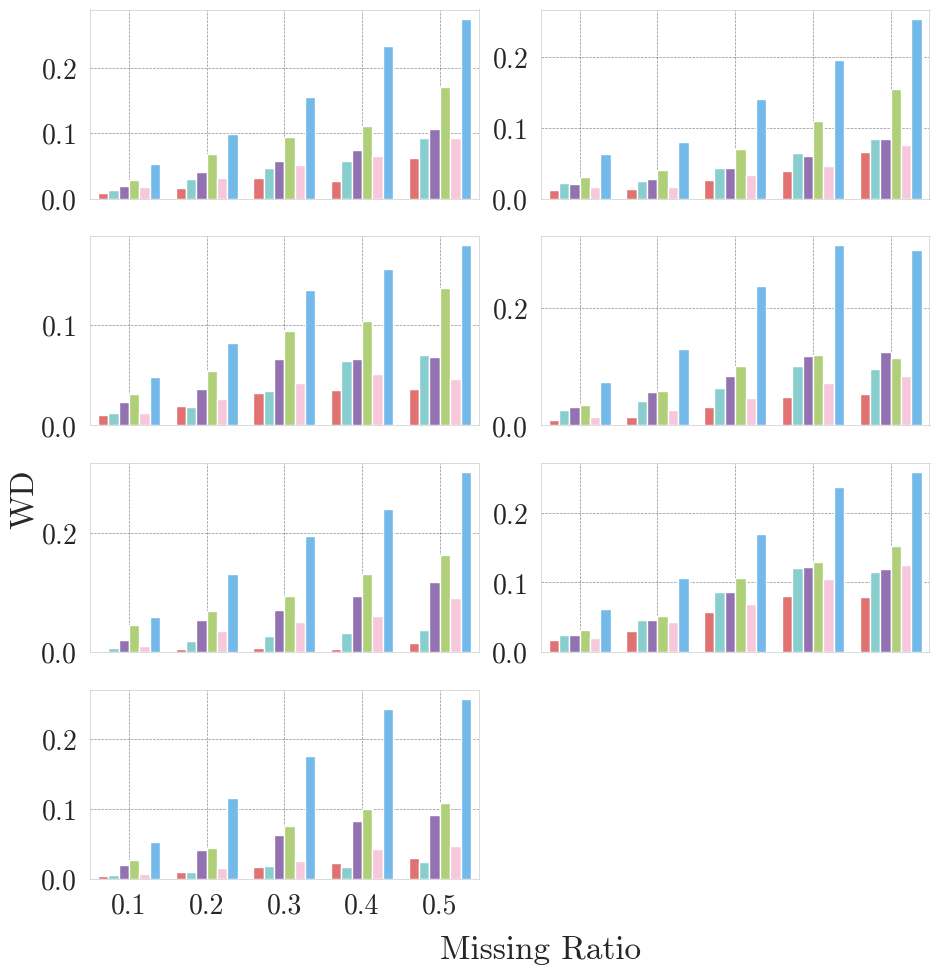

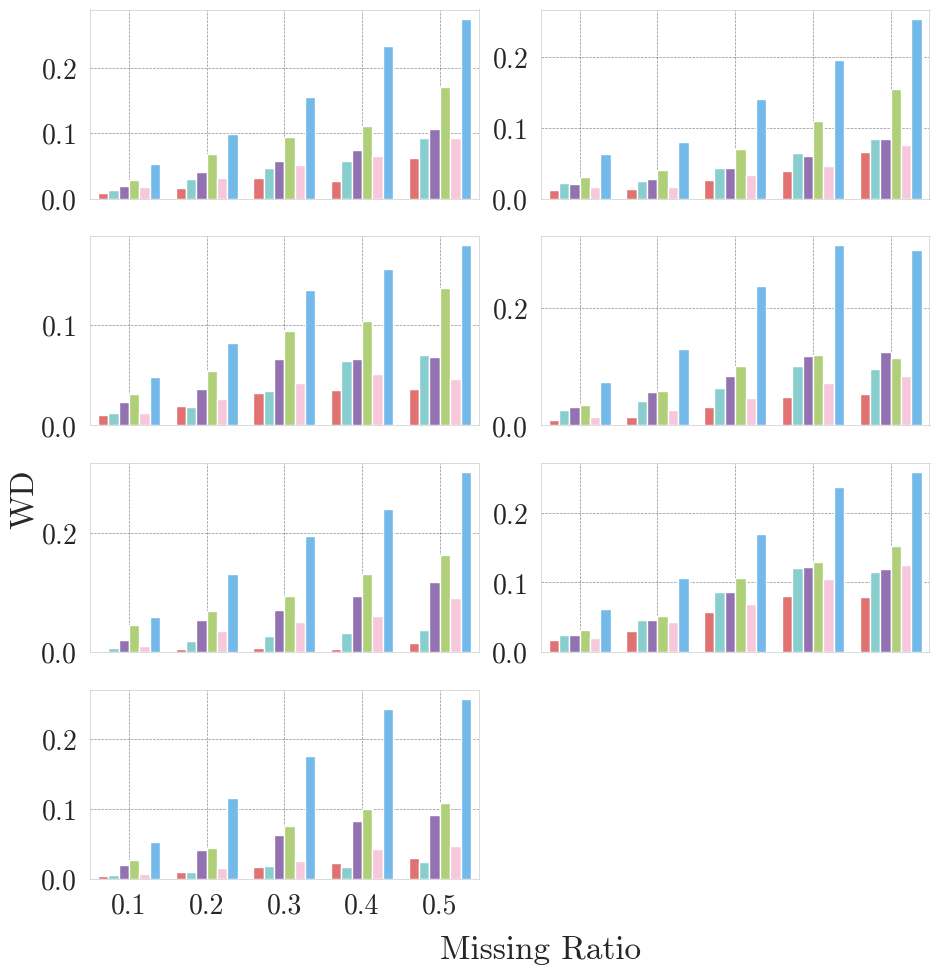

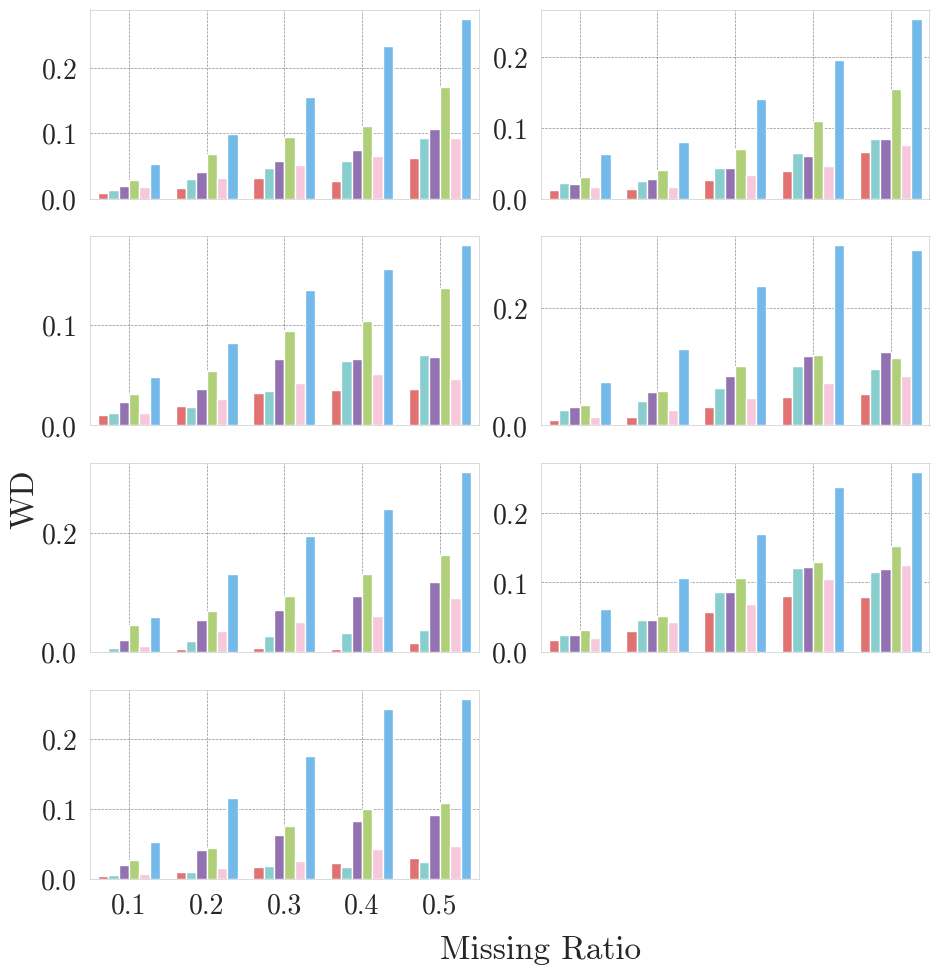

In [27]:


# files = glob.glob('./Et-knn-*_dis.csv')
for s in scenarios:
    files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
             '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
             '.\\Et-knn-glass_dis.csv',
             '.\\Et-knn-bandgap_dis.csv']
    print(files)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.subplots(4, 2, sharex=True)
    axes = axes.flatten()

    for file in files:
        ax = axes[files.index(file)]

        df = pd.read_csv(file)
        df[methods] = df[methods].applymap(extra_mean)
        df_MAR = df[df['Scenario'] == 'MAR']
        plot_data = pd.DataFrame(columns=["ratio", "method", "WD"])
        for method in methods:
            for i in range(len(df_MAR)):
                if method == "Evaluated: et":
                    method_plot = "MatImpute"
                else:
                    # 首字母大写
                    method_plot = method.capitalize()
                plot_data = pd.concat([plot_data, pd.DataFrame(
                    {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "WD": df_MAR.iloc[i][method]}, index=[0])])
        # 根据ratio画出每个方法的RMSE柱状图
        # ax = sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data)
        # 更改hue的顺序，根据顺序["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn","Mean", ]画柱状图
        sns.barplot(x="ratio", y="WD", hue="method", data=plot_data,
                    hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                    palette=my_palette, ax=ax,saturation=1)
        # set font size
        ax.tick_params(labelsize=20)

        # ax.yaxis.set_visible(False)
        # del legend
        ax.get_legend().remove()
        # del x label
        ax.set_xlabel('')
        # del y label
        ax.set_ylabel('')
        # set title
        # ax.set_title(file2plotname[file.split('-')[-1][:-8]], fontsize=24)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower right', fontsize=18, bbox_to_anchor=(0.98, 0.14), ncol=2)

    fig.text(0.07, 0.5, 'WD', va='center', rotation='vertical', fontsize=24)
    fig.text(0.5, 0.04, 'Missing Ratio', fontsize=24)
    # del axes
    for ax in axes[len(files):]:
        ax.remove()
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.2, wspace=0.16, left=0.15, bottom=0.12)
    fig.savefig(f'wd-result-{s}.png', dpi=300, bbox_inches='tight')

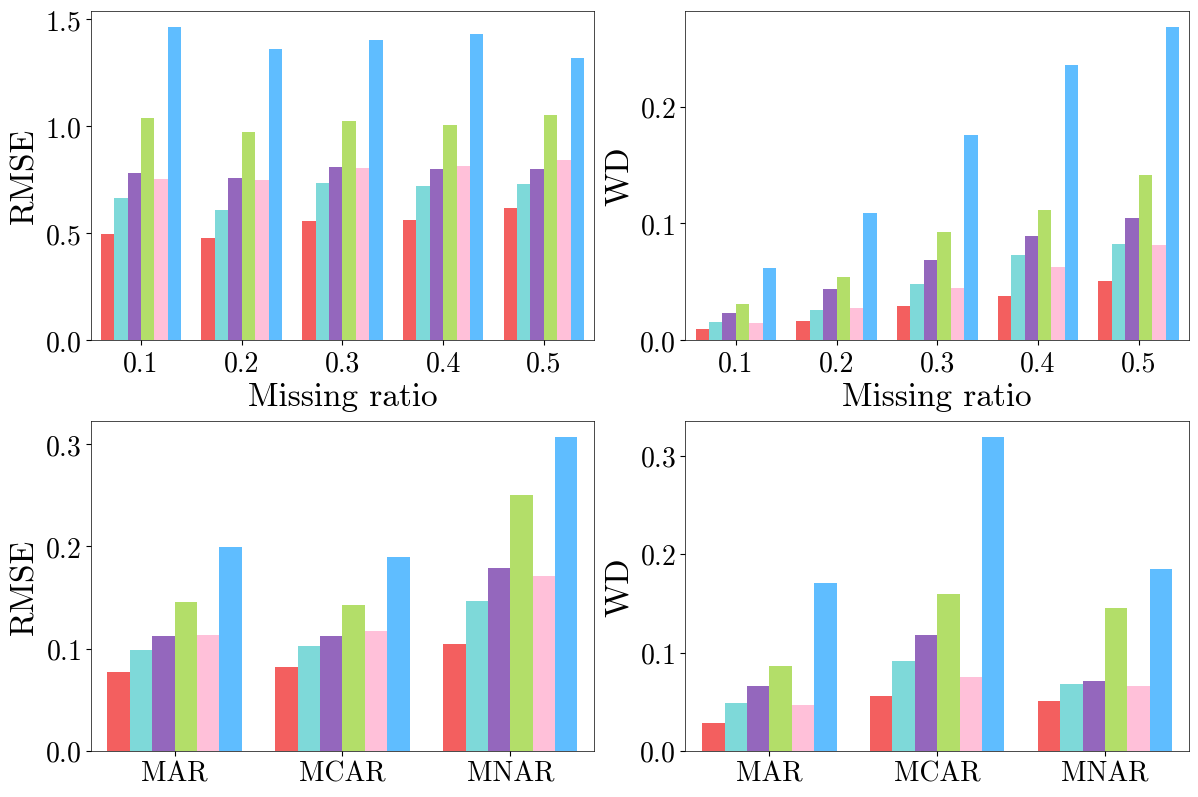

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
         '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
         '.\\Et-knn-glass_dis.csv',
         '.\\Et-knn-bandgap_dis.csv']
wd_result_df = None
for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MAR = df[df['Scenario'] == 'MAR']
    plot_data = pd.DataFrame(columns=["ratio", "method", "WD"])
    for method in methods:
        for i in range(len(df_MAR)):
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "WD": df_MAR.iloc[i][method]}, index=[0])])
    # print("====================================")
    # print(plot_data)
    if wd_result_df is None:
        wd_result_df = plot_data
    else:
        wd_result_df["WD"] += plot_data["WD"]
wd_result_df["WD"] /= len(files)

files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv', '.\\Et-knn-bandgap_rmse.csv']
rmse_result_df = None
for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MAR = df[df['Scenario'] == 'MAR']
    plot_data = pd.DataFrame(columns=["ratio", "method", "RMSE"])
    for method in methods:
        for i in range(len(df_MAR)):
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "RMSE": df_MAR.iloc[i][method]}, index=[0])])
    # print("====================================")
    # print(plot_data)
    if rmse_result_df is None:
        rmse_result_df = plot_data
    else:
        rmse_result_df["RMSE"] += plot_data["RMSE"]

sns.barplot(x="ratio", y="RMSE", hue="method", data=rmse_result_df,
            hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette, ax=axes[0],saturation=1)
# sns.lineplot(x="ratio", y="WD", hue="method", data=wd_result_df, ax=axes[0], color='black', linestyle='--')

sns.barplot(x="ratio", y="WD", hue="method", data=wd_result_df,
            hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette, ax=axes[1],saturation=1)
# sns.lineplot(x="ratio", y="RMSE", hue="method", data=rmse_result_df, ax=axes[1], color='black', linestyle='--')

axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20)
axes[0].set_xlabel('Missing ratio', fontsize=24)
axes[1].set_xlabel('Missing ratio', fontsize=24)
axes[0].set_ylabel('RMSE', fontsize=24)
axes[1].set_ylabel('WD', fontsize=24)
axes[0].get_legend().remove()
axes[1].get_legend().remove()

files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv',
         '.\\Et-knn-bandgap_rmse.csv']

average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.1]
    # 分别画出MAR，MCAR, MNAR的RMSE
    plot_data = pd.DataFrame(columns=["scenario", "method", "RMSE"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()

df_average = pd.DataFrame(columns=["scenario", "method", "RMSE"])
for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MNAR[method] / len(files)}, index=[0])])
ax = axes[2]
sns.barplot(x="scenario", y="RMSE", hue="method", data=df_average, ax=ax,
            hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette,saturation=1)

# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('RMSE', fontsize=24)

# wd
files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
         '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
         '.\\Et-knn-glass_dis.csv',
         '.\\Et-knn-bandgap_dis.csv']

average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.1]
    plot_data = pd.DataFrame(columns=["scenario", "method", "WD"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()
df_average = pd.DataFrame(columns=["scenario", "method", "WD"])

for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MNAR[method] / len(files)}, index=[0])])
ax = axes[3]
sns.barplot(x="scenario", y="WD", hue="method", data=df_average, ax=ax,
            hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette,saturation=1)
# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('WD', fontsize=24)
# add common legend below
handles, labels = ax.get_legend_handles_labels()

# fig.legend(handles, labels, loc='lower center', fontsize=20, bbox_to_anchor=(0.5, 0.05), ncol=3, frameon=False)
plt.tight_layout()
plt.savefig('results/rmse-wd-result.png', dpi=300, bbox_inches='tight')

['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv', '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv', '.\\Et-knn-glass_rmse.csv', '.\\Et-knn-Rajan_MXene_data_rmse.csv']


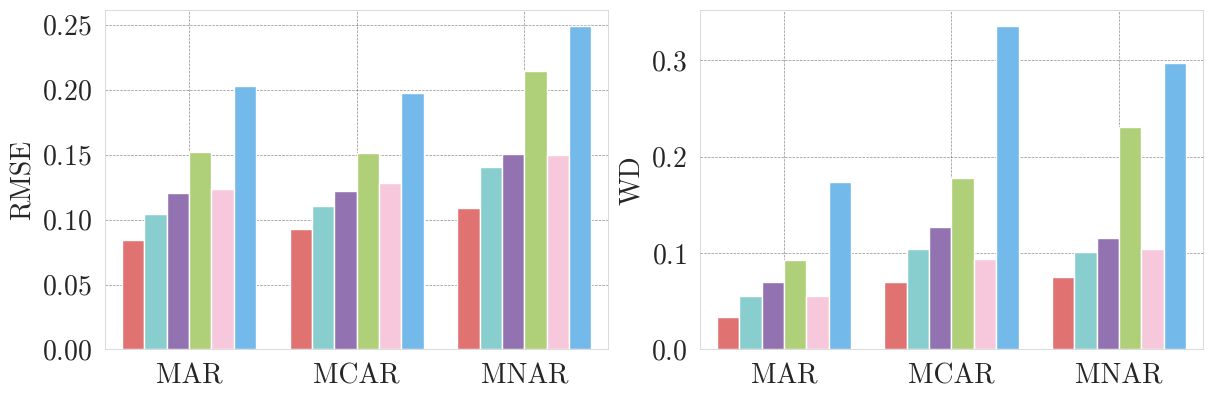

In [46]:
import glob
import warnings

warnings.filterwarnings("ignore")

my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#B3DE69", "#FFC0D9", "#5FBDFF", "#FDBF6F"])

# files = glob.glob('./Et-knn-*_rmse.csv')


fig.tight_layout()
plt.savefig('rmse-wd-scenario-result.png', dpi=300, bbox_inches='tight')

['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv', '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv', '.\\Et-knn-glass_rmse.csv', '.\\Et-knn-Rajan_MXene_data_rmse.csv']


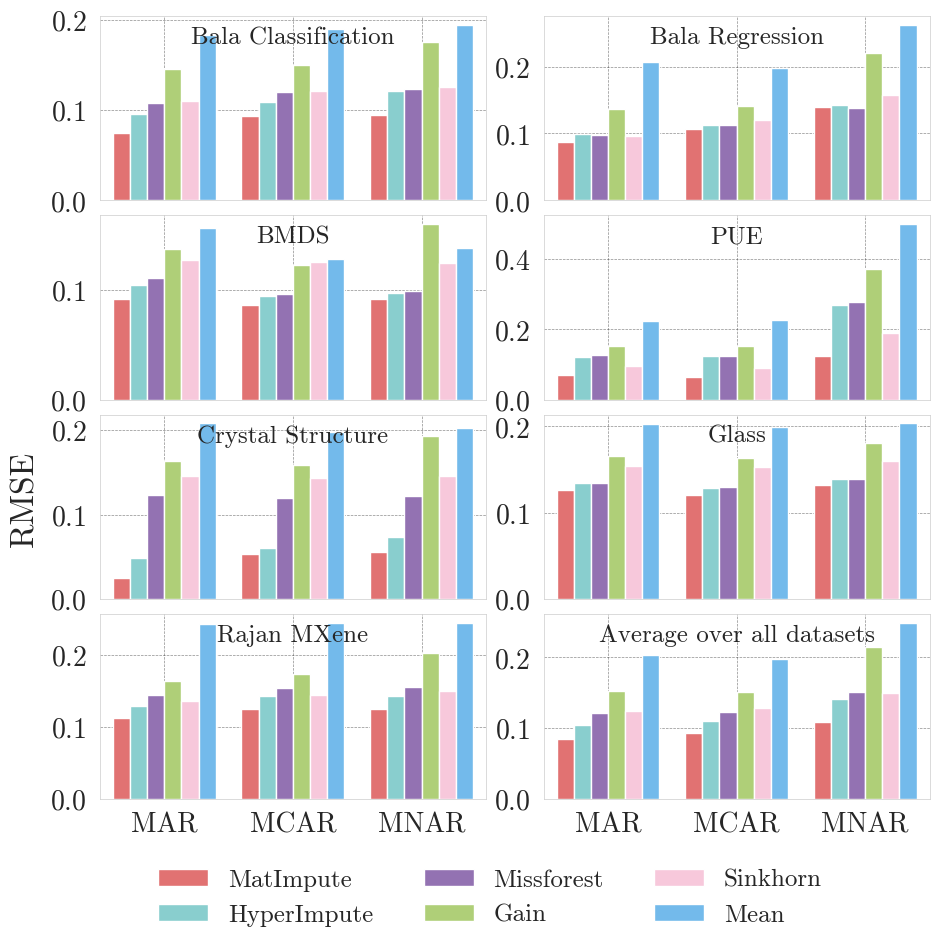

In [96]:
import glob
import warnings

warnings.filterwarnings("ignore")

my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#B3DE69", "#FFC0D9", "#5FBDFF", "#FDBF6F"])

# files = glob.glob('./Et-knn-*_rmse.csv')
files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv',
         '.\\Et-knn-bandgap_rmse.csv']
print(files)
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(4, 2, sharex=True)
axes = axes.flatten()
average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    ax = axes[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.2]
    # 分别画出MAR，MCAR, MNAR的RMSE
    plot_data = pd.DataFrame(columns=["scenario", "method", "RMSE"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()

    sns.barplot(x="scenario", y="RMSE", hue="method", data=plot_data,
                hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                palette=my_palette, ax=ax,saturation=1)

    # set font size
    ax.tick_params(labelsize=20)

    # del legend

    ax.get_legend().remove()

    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title inside
    ax.text(0.5, 0.85, file2plotname[file.split('-')[-1][:-9]], horizontalalignment='center', fontsize=18,
            transform=ax.transAxes)

df_average = pd.DataFrame(columns=["scenario", "method", "RMSE"])
for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MNAR[method] / len(files)}, index=[0])])
sns.barplot(x="scenario", y="RMSE", hue="method", data=df_average, ax=axes[-1],
            hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette,saturation=1)
ax = axes[-1]

# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('')
# set title inside
ax.text(0.5, 0.85, "Average over all datasets", horizontalalignment='center', fontsize=18,
        transform=ax.transAxes)
fig.tight_layout()
# set common ylabel
fig.text(0.07, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=24)
# set common legend bottom center
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=18, bbox_to_anchor=(0.55, 0.05), ncol=3, frameon=False)

fig.subplots_adjust(hspace=0.08, wspace=0.15, left=0.16, bottom=0.2)
fig.savefig('rmse-scenario-result.png', dpi=300, bbox_inches='tight')


['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv', '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv', '.\\Et-knn-glass_dis.csv', '.\\Et-knn-Rajan_MXene_data_dis.csv']


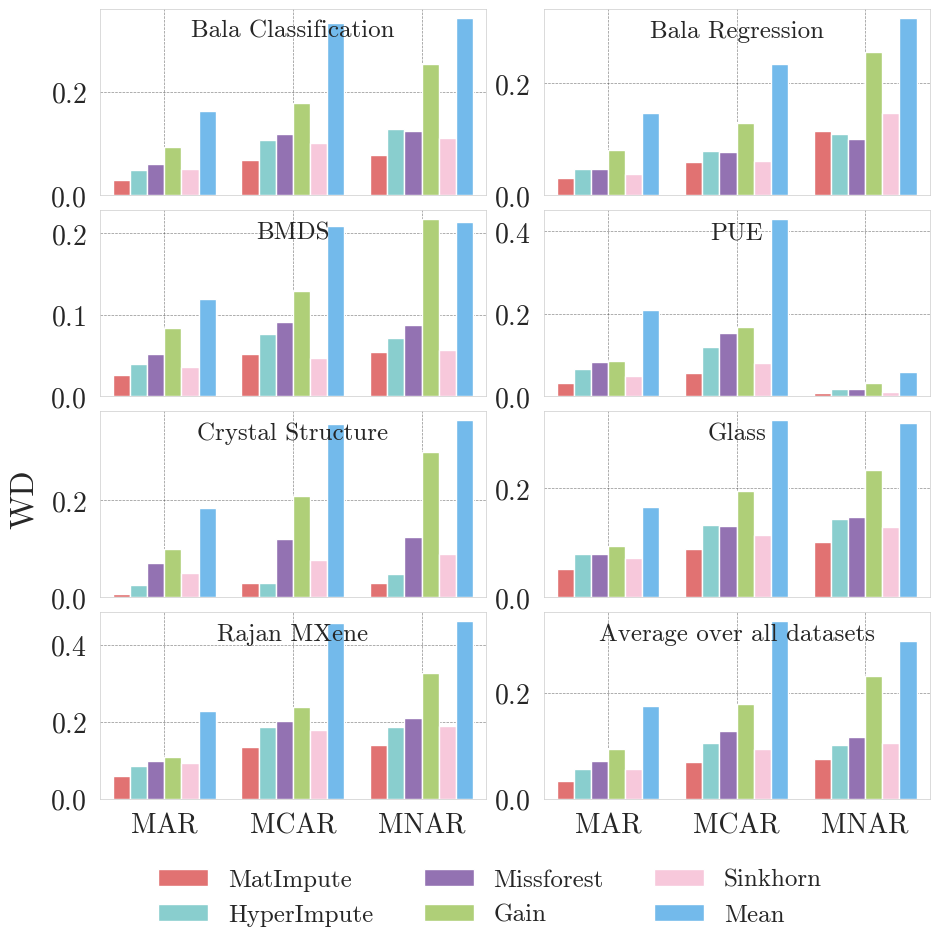

In [12]:
import glob
import warnings

warnings.filterwarnings("ignore")

methods = ['Evaluated: et', 'mean', 'hyperimpute', 'missforest', 'gain', 'sinkhorn']

my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#B3DE69", "#FFC0D9", "#5FBDFF", "#FDBF6F"])

# files = glob.glob('./Et-knn-*_rmse.csv')
files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
         '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
         '.\\Et-knn-glass_dis.csv',
         '.\\Et-knn-bandgap_dis.csv']
print(files)
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(4, 2, sharex=True)
axes = axes.flatten()
average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    ax = axes[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.2]
    plot_data = pd.DataFrame(columns=["scenario", "method", "WD"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()

    sns.barplot(x="scenario", y="WD", hue="method", data=plot_data,
                hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                palette=my_palette, ax=ax)

    # set font size
    ax.tick_params(labelsize=20)

    # del legend

    ax.get_legend().remove()

    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title inside
    ax.text(0.5, 0.85, file2plotname[file.split('-')[-1][:-8]], horizontalalignment='center', fontsize=18,
            transform=ax.transAxes)

df_average = pd.DataFrame(columns=["scenario", "method", "WD"])
for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MNAR[method] / len(files)}, index=[0])])
sns.barplot(x="scenario", y="WD", hue="method", data=df_average, ax=axes[-1],
            hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
            palette=my_palette)
ax = axes[-1]

# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('')
# set title inside
ax.text(0.5, 0.85, "Average over all datasets", horizontalalignment='center', fontsize=18,
        transform=ax.transAxes)
fig.tight_layout()
# set common ylabel
fig.text(0.07, 0.5, 'WD', va='center', rotation='vertical', fontsize=24)
# set common legend bottom center
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=18, bbox_to_anchor=(0.55, 0.05), ncol=3, frameon=False)

fig.subplots_adjust(hspace=0.08, wspace=0.15, left=0.16, bottom=0.2)
fig.savefig('wd-scenario-result.png', dpi=300, bbox_inches='tight')


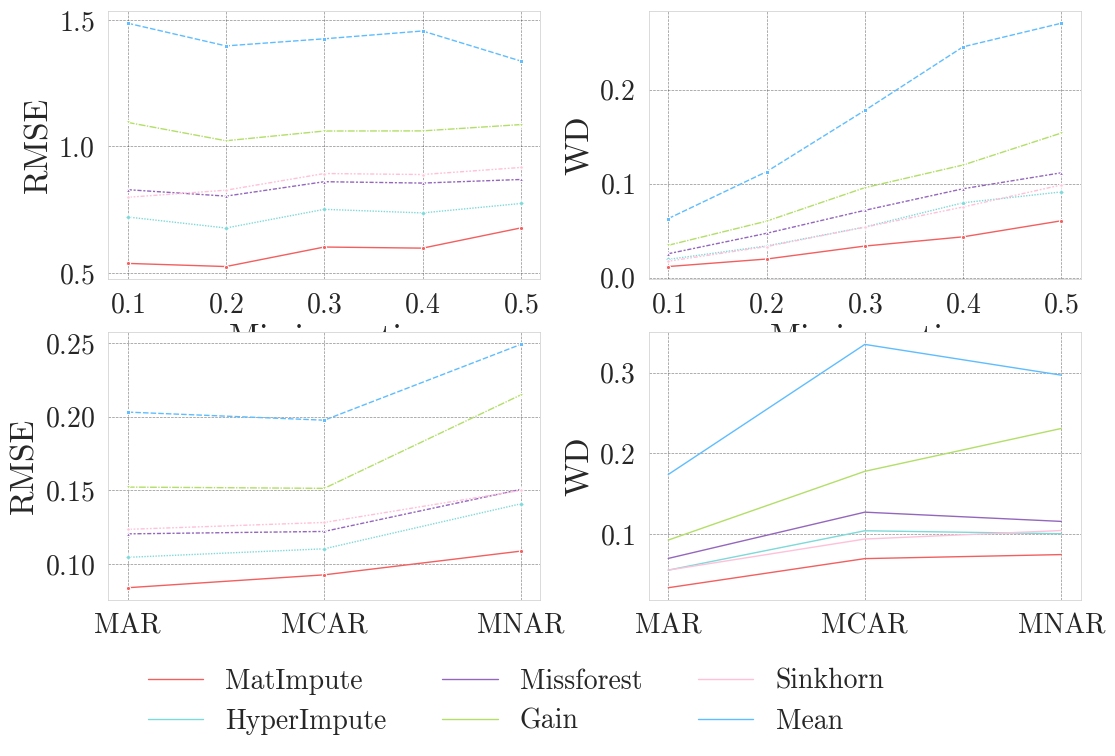

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
markers = ['o', 's', 'D', '^', 'v', 'p', 'P']

axes = axes.flatten()

files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
         '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
         '.\\Et-knn-glass_dis.csv',
         '.\\Et-knn-bandgap_dis.csv']
wd_result_df = None
for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MAR = df[df['Scenario'] == 'MAR']
    plot_data = pd.DataFrame(columns=["ratio", "method", "WD"])
    for method in methods:
        for i in range(len(df_MAR)):
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "WD": df_MAR.iloc[i][method]}, index=[0])])
    # print("====================================")
    # print(plot_data)
    if wd_result_df is None:
        wd_result_df = plot_data
    else:
        wd_result_df["WD"] += plot_data["WD"]
wd_result_df["WD"] /= len(files)

files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv', '.\\Et-knn-bandgap_rmse.csv']
rmse_result_df = None
for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MAR = df[df['Scenario'] == 'MAR']
    plot_data = pd.DataFrame(columns=["ratio", "method", "RMSE"])
    for method in methods:
        for i in range(len(df_MAR)):
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "RMSE": df_MAR.iloc[i][method]}, index=[0])])
    # print("====================================")
    # print(plot_data)
    if rmse_result_df is None:
        rmse_result_df = plot_data
    else:
        rmse_result_df["RMSE"] += plot_data["RMSE"]

sns.lineplot(x="ratio", y="RMSE", hue="method", data=rmse_result_df,
             hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
             palette=my_palette, ax=axes[0], markers=markers, style="method")

sns.lineplot(x="ratio", y="WD", hue="method", data=wd_result_df,
             hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
             palette=my_palette, ax=axes[1], markers=markers, style="method")


axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20)
axes[0].set_xlabel('Missing ratio', fontsize=24)
axes[1].set_xlabel('Missing ratio', fontsize=24)
axes[0].set_ylabel('RMSE', fontsize=24)
axes[1].set_ylabel('WD', fontsize=24)
axes[0].get_legend().remove()
axes[1].get_legend().remove()

files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
         '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
         '.\\Et-knn-glass_rmse.csv',
         '.\\Et-knn-bandgap_rmse.csv']

average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.1]
    # 分别画出MAR，MCAR, MNAR的RMSE
    plot_data = pd.DataFrame(columns=["scenario", "method", "RMSE"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()

df_average = pd.DataFrame(columns=["scenario", "method", "RMSE"])
for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "RMSE": average_MNAR[method] / len(files)}, index=[0])])
ax = axes[2]
sns.lineplot(x="scenario", y="RMSE", hue="method", data=df_average, ax=ax,
             hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
             palette=my_palette, markers=markers, style="method")

# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('RMSE', fontsize=24)

# wd
files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
         '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
         '.\\Et-knn-glass_dis.csv',
         '.\\Et-knn-bandgap_dis.csv']

average_MAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}
average_MNAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

average_MCAR = {
    "Evaluated: et": 0,
    "mean": 0,
    "hyperimpute": 0,
    "missforest": 0,
    "gain": 0,
    "sinkhorn": 0,
}

for file in files:
    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_miss_10 = df[df['miss_pct [0, 1]'] == 0.1]
    plot_data = pd.DataFrame(columns=["scenario", "method", "WD"])
    for method in methods:
        for s in ["MAR", "MCAR", "MNAR"]:
            if method == "Evaluated: et":
                method_plot = "MatImpute"
            elif method == "hyperimpute":
                method_plot = "HyperImpute"
            else:
                # 首字母大写
                method_plot = method.capitalize()
            plot_data = pd.concat([plot_data, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": df[df['Scenario'] == s][method].mean()}, index=[0])])
            if s == "MAR":
                average_MAR[method] += df[df['Scenario'] == s][method].mean()
            elif s == "MCAR":
                average_MCAR[method] += df[df['Scenario'] == s][method].mean()
            else:
                average_MNAR[method] += df[df['Scenario'] == s][method].mean()
df_average = pd.DataFrame(columns=["scenario", "method", "WD"])

for method in methods:
    for s in ["MAR", "MCAR", "MNAR"]:
        if method == "Evaluated: et":
            method_plot = "MatImpute"
        elif method == "hyperimpute":
            method_plot = "HyperImpute"
        else:
            # 首字母大写
            method_plot = method.capitalize()
        if s == "MAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MAR[method] / len(files)}, index=[0])])
        elif s == "MCAR":
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MCAR[method] / len(files)}, index=[0])])
        else:
            df_average = pd.concat([df_average, pd.DataFrame(
                {"scenario": s, "method": method_plot, "WD": average_MNAR[method] / len(files)}, index=[0])])
ax = axes[3]
sns.lineplot(x="scenario", y="WD", hue="method", data=df_average, ax=ax,
             hue_order=["MatImpute", "HyperImpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
             palette=my_palette, markers=markers)

# set font size
ax.tick_params(labelsize=20)
# del legend
ax.get_legend().remove()
# del x label
ax.set_xlabel('')
# del y label
ax.set_ylabel('WD', fontsize=24)
# add common legend below
handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower center', fontsize=20, bbox_to_anchor=(0.5, 0.05), ncol=3, frameon=False)
fig.subplots_adjust(hspace=0.2, wspace=0.25, left=0.16, bottom=0.25)

['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv', '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-CCPM_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv', '.\\Et-knn-glass_rmse.csv', '.\\Et-knn-Rajan_MXene_data_rmse.csv']


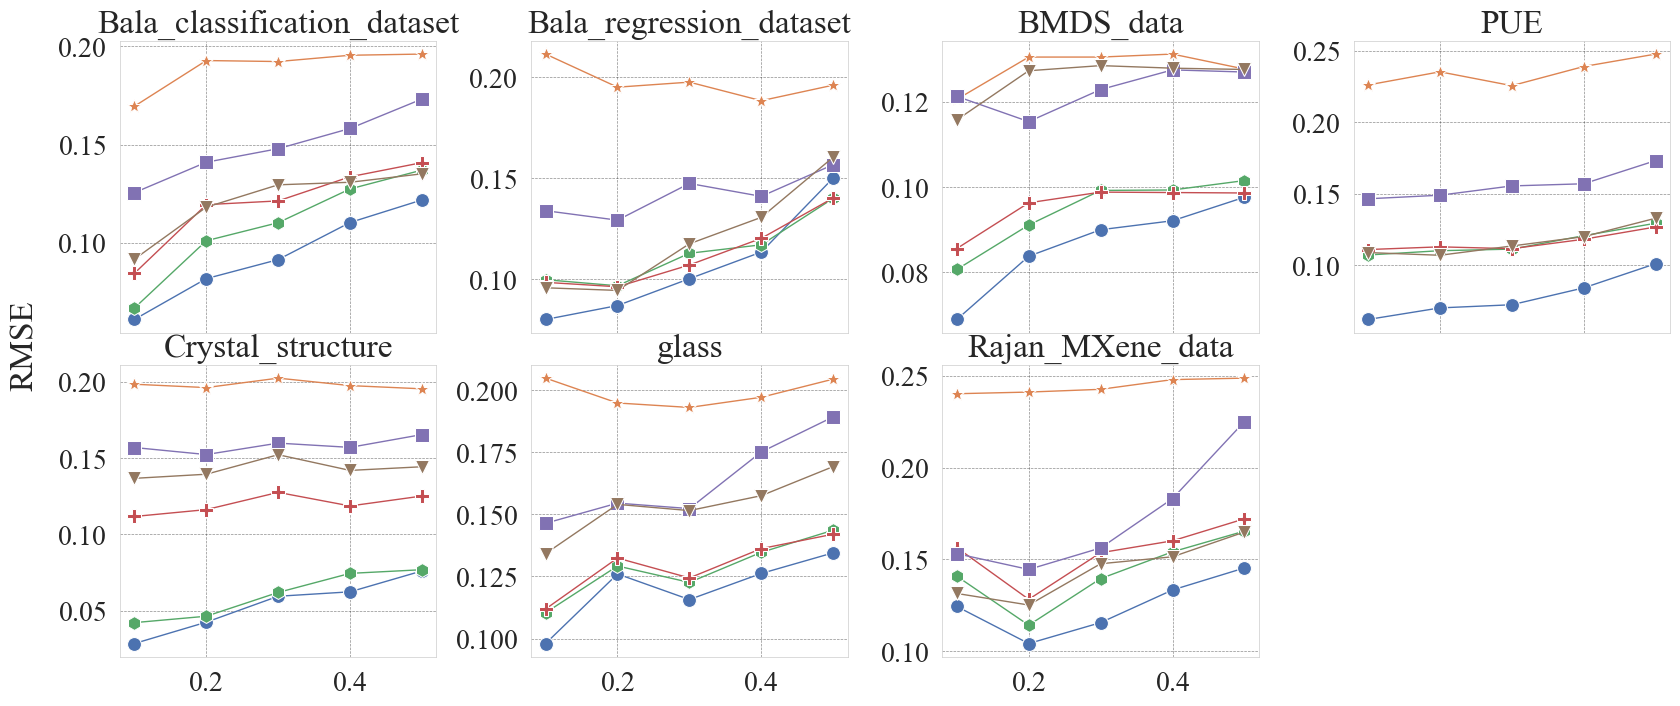

In [10]:
import glob

files = glob.glob('./Et-knn-*_rmse.csv')
print(files)
fig = plt.figure(figsize=(20, 8))
axes = fig.subplots(2, 4, sharex=True)
axes = axes.flatten()

for file in files:
    ax = axes[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MCAR = df[df['Scenario'] == 'MCAR']
    # set font as times new roman
    plt.rcParams["font.family"] = "Times New Roman"

    sns.lineplot(x="miss_pct [0, 1]", y="Evaluated: et", data=df_MCAR, label='MatImpute', ax=ax, marker='o',
                 markersize=10)
    sns.lineplot(x="miss_pct [0, 1]", y="mean", data=df_MCAR, label='Mean', ax=ax, marker='*', markersize=10)
    sns.lineplot(x="miss_pct [0, 1]", y="hyperimpute", data=df_MCAR, label='Hyperimpute', ax=ax, marker='h',
                 markersize=10)
    sns.lineplot(x="miss_pct [0, 1]", y="missforest", data=df_MCAR, label='Missforest', ax=ax, marker='P',
                 markersize=10)
    sns.lineplot(x="miss_pct [0, 1]", y="gain", data=df_MCAR, label='Gain', ax=ax, marker='s', markersize=10)
    sns.lineplot(x="miss_pct [0, 1]", y="sinkhorn", data=df_MCAR, label='Sinkhorn', ax=ax, marker='v', markersize=10)

    ax.set(xlabel='Missing ratio', ylabel='RMSE')
    # set font size
    ax.tick_params(labelsize=20)
    # del legend
    ax.get_legend().remove()
    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title
    if 'CCPM' in file:
        ax.set_title("PUE", fontsize=24)
    else:
        ax.set_title(file.split('-')[-1][:-9], fontsize=24)
    # ax.set_title(file.split('-')[-1][:-9],fontsize=20)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', fontsize=20, bbox_to_anchor=(0.9, 0.1))
# set figure xlabel
# fig.text(0.5, 0.04, 'Missing Ratio', fontsize=24)
# set figure ylabel
fig.text(0.07, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=24)
# del axes
for ax in axes[len(files):]:
    ax.remove()
fig.subplots_adjust(hspace=0.11, wspace=0.3)
# set subplots 
fig.savefig('rmse-result.png', dpi=300, bbox_inches='tight')


['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv', '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-CCPM_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv', '.\\Et-knn-glass_dis.csv', '.\\Et-knn-Rajan_MXene_data_dis.csv']


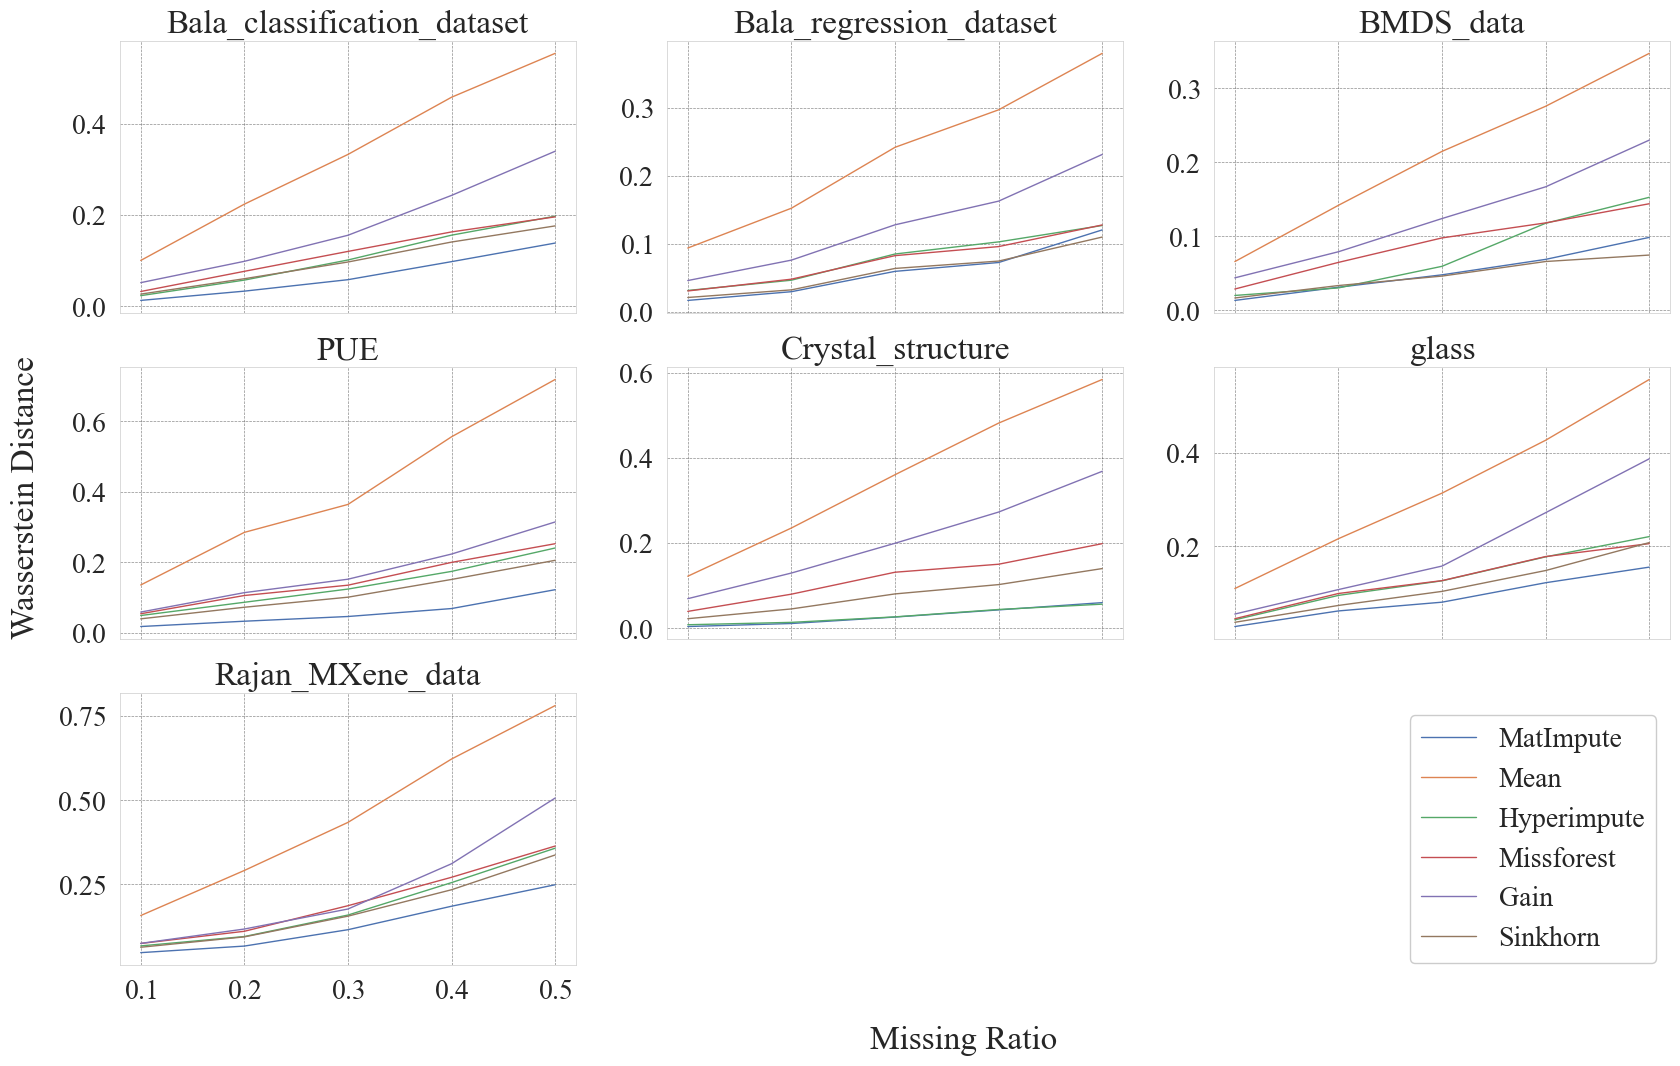

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
import glob

files = glob.glob('./Et-knn-*_dis.csv')
print(files)
fig = plt.figure(figsize=(20, 12))
axes = fig.subplots(3, 3, sharex=True)
axes = axes.flatten()

for file in files:
    ax = axes[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MCAR = df[df['Scenario'] == 'MCAR']
    # set font as times new roman
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(10, 6))
    sns.lineplot(x="miss_pct [0, 1]", y="Evaluated: et", data=df_MCAR, label='MatImpute', ax=ax)
    sns.lineplot(x="miss_pct [0, 1]", y="mean", data=df_MCAR, label='Mean', ax=ax)
    sns.lineplot(x="miss_pct [0, 1]", y="hyperimpute", data=df_MCAR, label='Hyperimpute', ax=ax)
    sns.lineplot(x="miss_pct [0, 1]", y="missforest", data=df_MCAR, label='Missforest', ax=ax)
    sns.lineplot(x="miss_pct [0, 1]", y="gain", data=df_MCAR, label='Gain', ax=ax)
    sns.lineplot(x="miss_pct [0, 1]", y="sinkhorn", data=df_MCAR, label='Sinkhorn', ax=ax)

    # set font size
    ax.tick_params(labelsize=20)
    # del legend
    ax.get_legend().remove()
    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title
    if 'CCPM' in file:
        ax.set_title("PUE", fontsize=24)
    else:
        ax.set_title(file.split('-')[-1][:-8], fontsize=24)
    # ax.set_title(file.split('-')[-1][:-9],fontsize=20)
# axes[2].legend(fontsize=15,loc='upper right')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', fontsize=20, bbox_to_anchor=(0.9, 0.1))
# fig.tight_layout()
# set figure xlabel
fig.text(0.5, 0.04, 'Missing Ratio', fontsize=24)
# set figure ylabel
fig.text(0.07, 0.5, 'Wasserstein Distance', va='center', rotation='vertical', fontsize=24)
# del axes
for ax in axes[len(files):]:
    ax.remove()
# set subplots 
fig.savefig('dis-result.png', dpi=300, bbox_inches='tight')


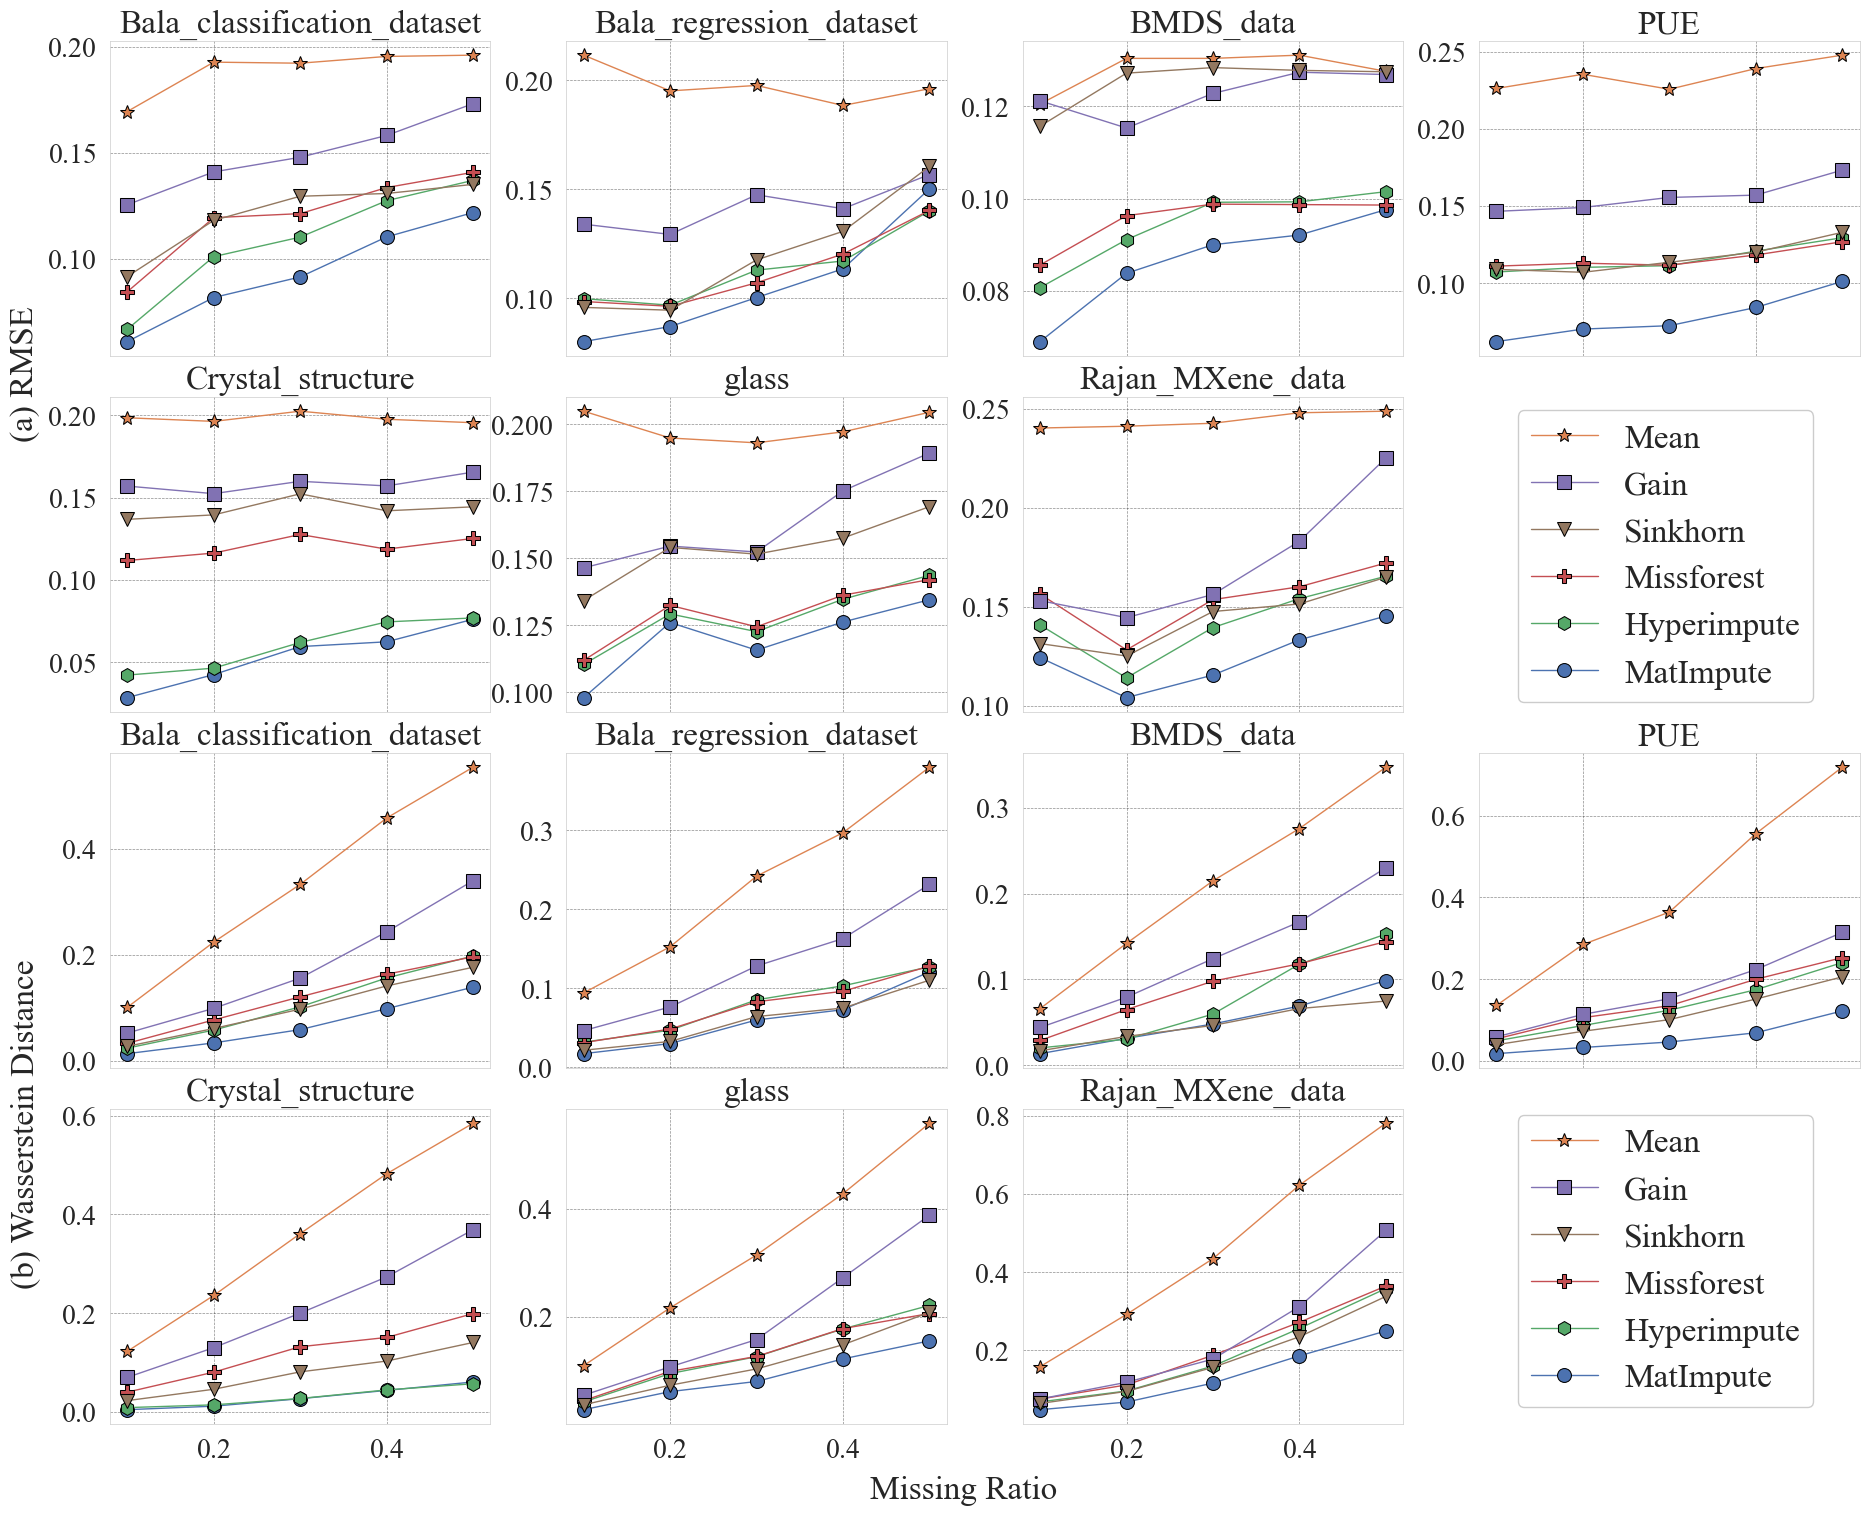

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [13]:
import glob

files = glob.glob('./Et-knn-*_rmse.csv')
fig = plt.figure(figsize=(20, 15))
axes = fig.subplots(4, 4, sharex=True)
axes = axes.flatten()
axes1 = axes[:len(axes) // 2]
axes2 = axes[len(axes) // 2:]

for file in files:
    ax = axes1[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MCAR = df[df['Scenario'] == 'MCAR']
    # set font as times new roman
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(2, 2))

    sns.lineplot(x="miss_pct [0, 1]", y="Evaluated: et", data=df_MCAR, label='MatImpute', ax=ax, marker='o',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="mean", data=df_MCAR, label='Mean', ax=ax, marker='*', markersize=10,
                 markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="hyperimpute", data=df_MCAR, label='Hyperimpute', ax=ax, marker='h',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="missforest", data=df_MCAR, label='Missforest', ax=ax, marker='P',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="gain", data=df_MCAR, label='Gain', ax=ax, marker='s', markersize=10,
                 markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="sinkhorn", data=df_MCAR, label='Sinkhorn', ax=ax, marker='v', markersize=10,
                 markeredgecolor='black')

    ax.set(xlabel='Missing ratio', ylabel='RMSE')
    # set font size
    ax.tick_params(labelsize=20)
    # del legend
    ax.get_legend().remove()
    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title
    if 'CCPM' in file:
        ax.set_title("PUE", fontsize=24)
    else:
        ax.set_title(file.split('-')[-1][:-9], fontsize=24)
handles, labels = ax.get_legend_handles_labels()
orders = [1, 4, 5, 3, 2, 0]
fig.legend([handles[idx] for idx in orders], [labels[idx] for idx in orders], loc='lower right', fontsize=24,
           bbox_to_anchor=(0.98, 0.52))
# del axes
for ax in axes1[len(files):]:
    ax.remove()

import glob

files = glob.glob('./Et-knn-*_dis.csv')

for file in files:
    ax = axes2[files.index(file)]

    df = pd.read_csv(file)
    df[methods] = df[methods].applymap(extra_mean)
    df_MCAR = df[df['Scenario'] == 'MCAR']
    # set font as times new roman
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(2, 2))
    sns.lineplot(x="miss_pct [0, 1]", y="Evaluated: et", data=df_MCAR, label='MatImpute', ax=ax, marker='o',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="mean", data=df_MCAR, label='Mean', ax=ax, marker='*', markersize=10,
                 markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="hyperimpute", data=df_MCAR, label='Hyperimpute', ax=ax, marker='h',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="missforest", data=df_MCAR, label='Missforest', ax=ax, marker='P',
                 markersize=10, markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="gain", data=df_MCAR, label='Gain', ax=ax, marker='s', markersize=10,
                 markeredgecolor='black')
    sns.lineplot(x="miss_pct [0, 1]", y="sinkhorn", data=df_MCAR, label='Sinkhorn', ax=ax, marker='v', markersize=10,
                 markeredgecolor='black')

    # set font size
    ax.tick_params(labelsize=20)
    # del legend
    ax.get_legend().remove()
    # del x label
    ax.set_xlabel('')
    # del y label
    ax.set_ylabel('')
    # set title
    if 'CCPM' in file:
        ax.set_title("PUE", fontsize=24)
    else:
        ax.set_title(file.split('-')[-1][:-8], fontsize=24)
# add legend
handles, labels = ax.get_legend_handles_labels()
orders = [1, 4, 5, 3, 2, 0]
fig.legend([handles[idx] for idx in orders], [labels[idx] for idx in orders], loc='lower right', fontsize=24,
           bbox_to_anchor=(0.98, 0.05))

# del axes
for ax in axes2[len(files):]:
    ax.remove()

fig.text(0.5, 0.0, 'Missing Ratio', fontsize=24)
# set figure ylabel
fig.text(0.07, 0.75, '(a) RMSE', va='center', rotation='vertical', fontsize=24)

fig.text(0.07, 0.25, '(b) Wasserstein Distance', va='center', rotation='vertical', fontsize=24)

fig.tight_layout()
fig.subplots_adjust(hspace=0.13, wspace=0.2, bottom=0.05, left=0.12)

# set subplots 
fig.savefig('model-result.png', dpi=300, bbox_inches='tight')


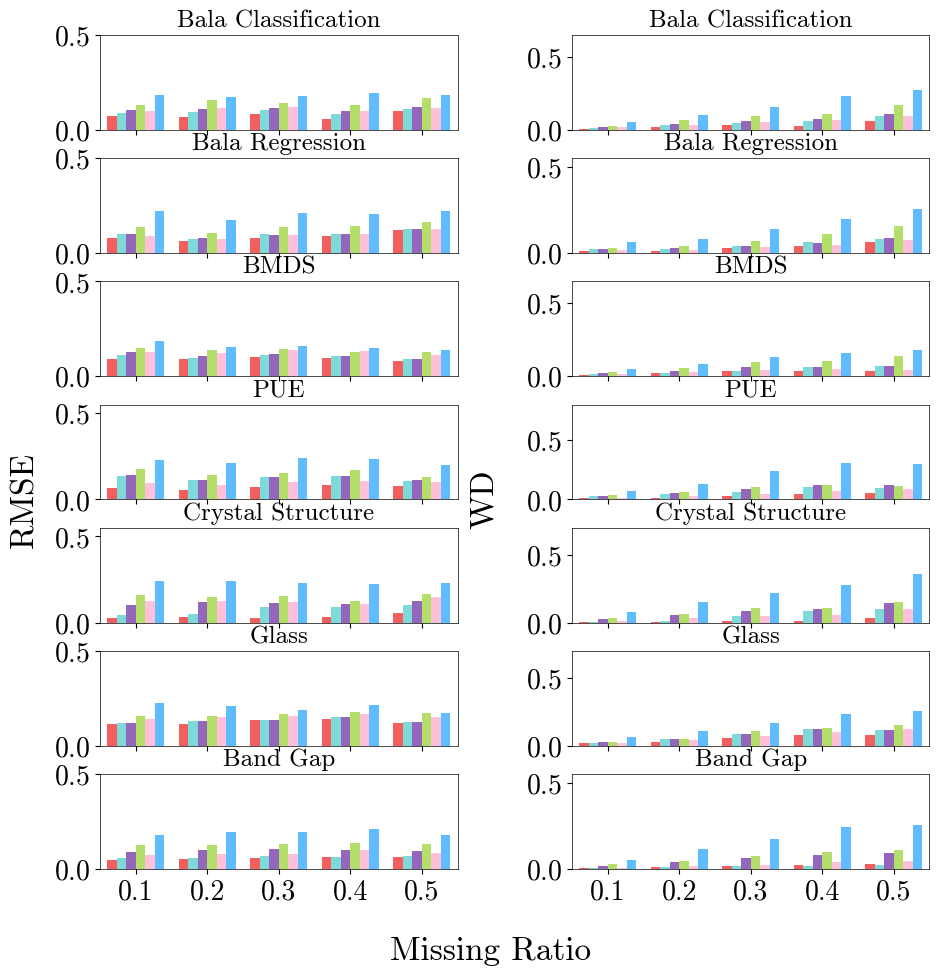

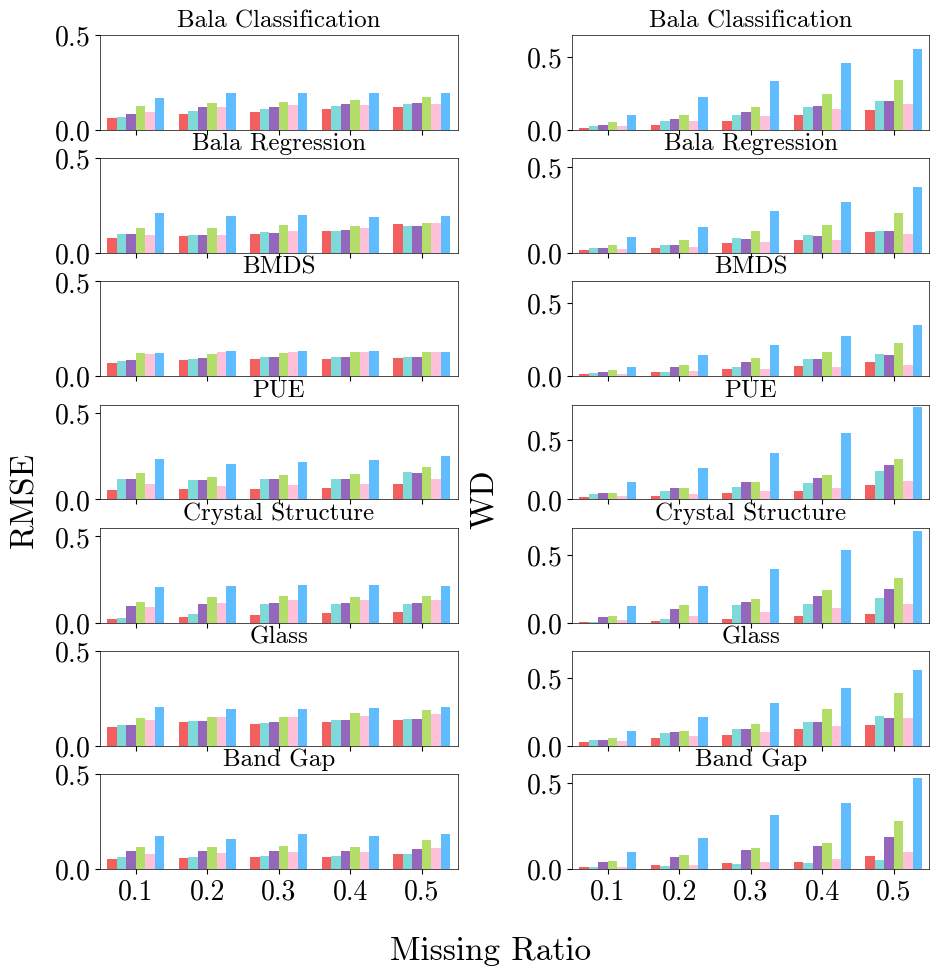

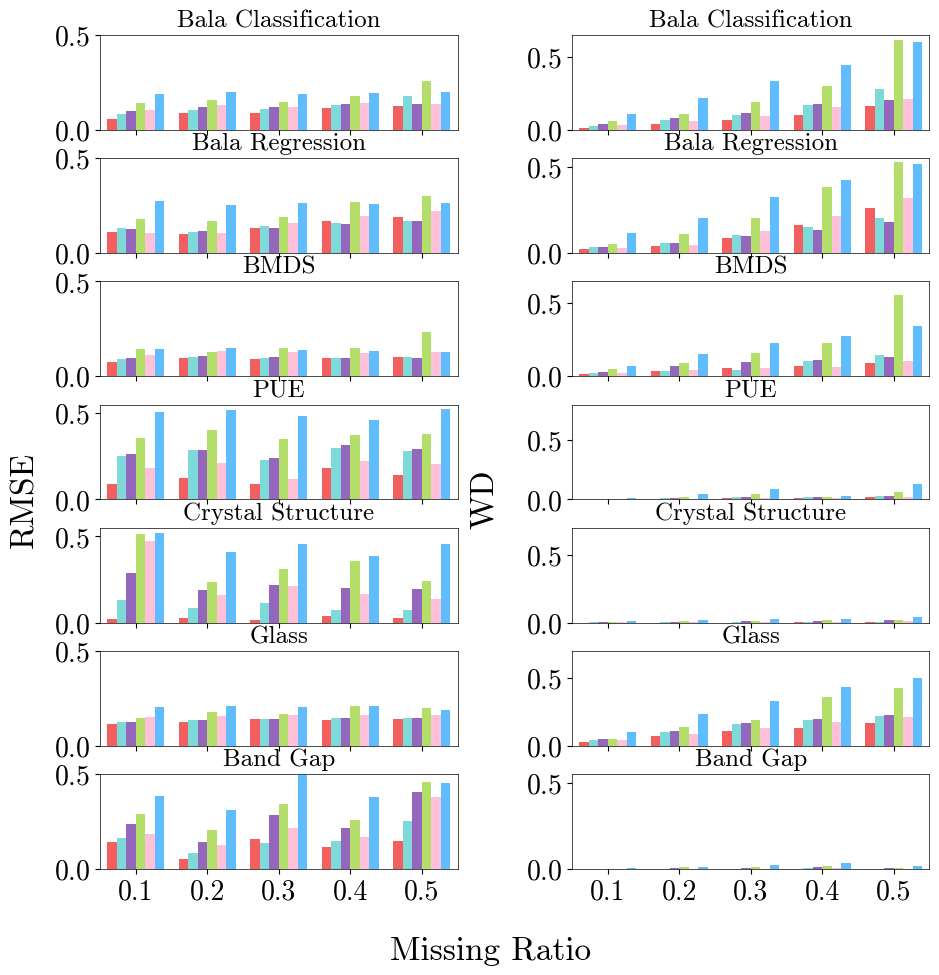

In [2]:


# files = glob.glob('./Et-knn-*_rmse.csv')
# files.remove('.\\Et-knn-CCPM_rmse.csv')

file2plotname = {
    "Bala_classification_dataset": "Bala Classification",
    "Bala_regression_dataset": "Bala Regression",
    "CCPM": "PUE",
    "BMDS_data": "BMDS",
    "Crystal_structure": "Crystal Structure",
    "glass": "Glass",
    "Rajan_MXene_data": "Rajan MXene",
    "PUE": "PUE",
    "bandgap": "Band Gap",
}

maxrmse = {
    "Bala Classification": 0.5,
    "Bala Regression": 0.5,
    "BMDS": 0.5,
    "PUE": 0.55,
    "Crystal Structure": 0.55,
    "Glass": 0.5,
    "Band Gap": 0.5
}

maxwd = {
    "Bala Classification": 0.65,
    "Bala Regression": 0.55,
    "BMDS": 0.65,
    "PUE": 0.8,
    "Crystal Structure": 0.7,
    "Glass": 0.7,
    "Band Gap": 0.55
}

rmse_files = ['.\\Et-knn-Bala_classification_dataset_rmse.csv', '.\\Et-knn-Bala_regression_dataset_rmse.csv',
              '.\\Et-knn-BMDS_data_rmse.csv', '.\\Et-knn-PUE_rmse.csv', '.\\Et-knn-Crystal_structure_rmse.csv',
              '.\\Et-knn-glass_rmse.csv',
              '.\\Et-knn-bandgap_rmse.csv']
dis_files = ['.\\Et-knn-Bala_classification_dataset_dis.csv', '.\\Et-knn-Bala_regression_dataset_dis.csv',
             '.\\Et-knn-BMDS_data_dis.csv', '.\\Et-knn-PUE_dis.csv', '.\\Et-knn-Crystal_structure_dis.csv',
             '.\\Et-knn-glass_dis.csv',
             '.\\Et-knn-bandgap_dis.csv']

scenarios = ['MAR', 'MCAR', 'MNAR']

for s in scenarios:
    fig = plt.figure(figsize=(10, 10))
    axes = fig.subplots(7, 2, sharex=True)
    idx = 0
    axes = axes.flatten()
    for file in rmse_files:
        ax = axes[idx * 2]
        idx += 1
        df = pd.read_csv(file)
        df[methods] = df[methods].applymap(extra_mean)
        df_MAR = df[df['Scenario'] == s]
        plot_data = pd.DataFrame(columns=["ratio", "method", "RMSE"])
        for method in methods:
            for i in range(len(df_MAR)):
                if method == "Evaluated: et":
                    method_plot = "MatImpute"
                else:
                    # 首字母大写
                    method_plot = method.capitalize()
                plot_data = pd.concat([plot_data, pd.DataFrame(
                    {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "RMSE": df_MAR.iloc[i][method]}, index=[0])])
        # 根据ratio画出每个方法的RMSE柱状图
        # ax = sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data)
        # 更改hue的顺序，根据顺序["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn","Mean", ]画柱状图
        sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data,
                    hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                    palette=my_palette, ax=ax,saturation=1)

        # set font size
        ax.tick_params(labelsize=20)
        # ax.yaxis.set_visible(False)
        # del legend
        ax.get_legend().remove()
        # del x label
        ax.set_xlabel('')
        # del y label
        ax.set_ylabel('')
        # ax.set_ylim(0, 0.55)
        # set title
        title = file2plotname[file.split('-')[-1][:-9]]
        ax.set_ylim(0,maxrmse[title])
        ax.set_title(title, fontsize=18)
    idx = 0
    for file in dis_files:
        ax = axes[2 * idx + 1]
        idx += 1
        df = pd.read_csv(file)
        df[methods] = df[methods].applymap(extra_mean)
        df_MAR = df[df['Scenario'] == s]
        plot_data = pd.DataFrame(columns=["ratio", "method", "WD"])
        for method in methods:
            for i in range(len(df_MAR)):
                if method == "Evaluated: et":
                    method_plot = "MatImpute"
                else:
                    # 首字母大写
                    method_plot = method.capitalize()
                plot_data = pd.concat([plot_data, pd.DataFrame(
                    {"ratio": df_MAR.iloc[i, 1], "method": method_plot, "WD": df_MAR.iloc[i][method]}, index=[0])])
        # 根据ratio画出每个方法的RMSE柱状图
        # ax = sns.barplot(x="ratio", y="RMSE", hue="method", data=plot_data)
        # 更改hue的顺序，根据顺序["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn","Mean", ]画柱状图
        sns.barplot(x="ratio", y="WD", hue="method", data=plot_data,
                    hue_order=["MatImpute", "Hyperimpute", "Missforest", "Gain", "Sinkhorn", "Mean"],
                    palette=my_palette, ax=ax,saturation=1)

        # set font size
        ax.tick_params(labelsize=20)
        # ax.yaxis.set_visible(False)
        # del legend
        ax.get_legend().remove()
        # del x label
        ax.set_xlabel('')
        # del y label
        ax.set_ylabel('')
        # ax.set_ylim(0, 0.55)
        # set title
        title = file2plotname[file.split('-')[-1][:-8]]
        ax.set_ylim(0,maxwd[title])
        ax.set_title(title, fontsize=18)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower center', fontsize=14, ncol=6, frameon=False)
    fig.text(0.07, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=24)
    fig.text(0.53, 0.5, 'WD', va='center', rotation='vertical', fontsize=24)
    fig.text(0.45, 0.04, 'Missing Ratio', fontsize=24)
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.32, left=0.16, bottom=0.13)
    fig.savefig(f'results/{s}-result.png', dpi=300, bbox_inches='tight')
